In [2]:
%matplotlib inline 

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


In [3]:
from sklearn import datasets

# Not much else here other than the raw data
diabet=datasets.load_diabetes()
print(diabet)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [4]:
#affciher les categories du dataset
print(diabet.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [5]:
print(diabet.data_filename)

/Users/nadiasalehddine/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/diabetes_data.csv.gz


In [6]:
dataframe_diabet = pd.DataFrame(diabet.data)
print(dataframe_diabet.head())


          0         1         2         3         4         5         6  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

          7         8         9  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [7]:
dataframe_diabet.columns = diabet.feature_names
print(dataframe_diabet.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [8]:

dataframe_diabet_target = pd.DataFrame(diabet.target)
print(dataframe_diabet_target.head())

       0
0  151.0
1   75.0
2  141.0
3  206.0
4  135.0


In [9]:
#ajouter la colonne  à perdir  et la renommer
dataframe_diabet['PREDICT'] = diabet.target
print(dataframe_diabet.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  PREDICT  
0 -0.002592  0.019908 -0.017646    151.0  
1 -0.039493 -0.068330 -0.092204     75.0  
2 -0.002592  0.002864 -0.025930    141.0  
3  0.034309  0.022692 -0.009362    206.0  
4 -0.002592 -0.031991 -0.046641    135.0  


/Users/nadiasalehddine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


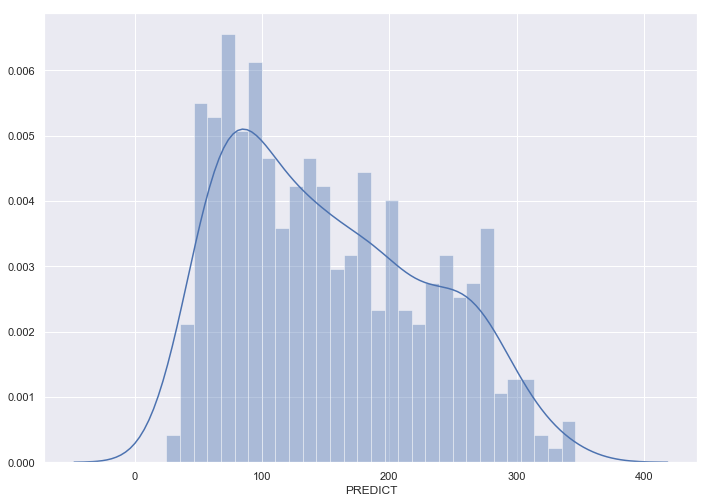

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataframe_diabet['PREDICT'], bins=30)
plt.show()
###les valeurs sont dispersés

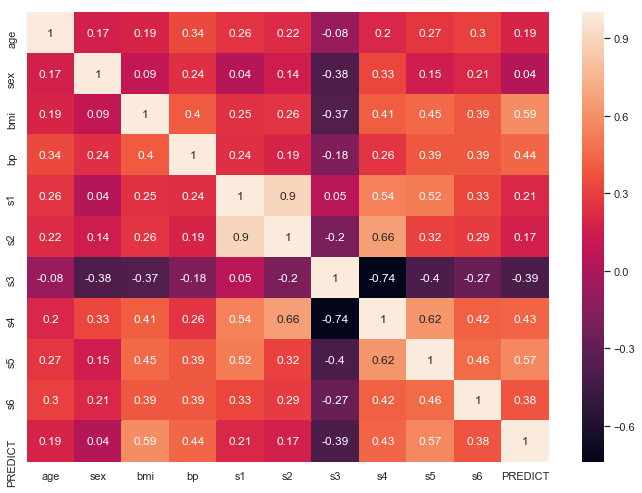

In [11]:
 # dessiner la matroce de correlation a partir du dataframe 
correlation_matrix = dataframe_diabet.corr().round(2)
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
print(dataframe_diabet.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [13]:
print(diabet.data.shape)

(442, 10)


In [14]:
#attention a l'importation
import sklearn
from sklearn.model_selection import train_test_split

In [15]:
#separer les dataset
#enlever la colonne price du dataset pour la variable X
X = dataframe_diabet.drop('PREDICT', axis = 1)
#ce dataset contient uniquement la variable prix
Y = dataframe_diabet['PREDICT']

In [16]:
Y.count()

442

In [17]:
#test c  l'echantillon on a en deux:le premier 30 pour cent du dataframe sans la valeur à predire et l autre 30 de
#separation des datasets  x et y en training (33%) et  en test (66%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(296, 10)
(146, 10)
(296,)
(146,)


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

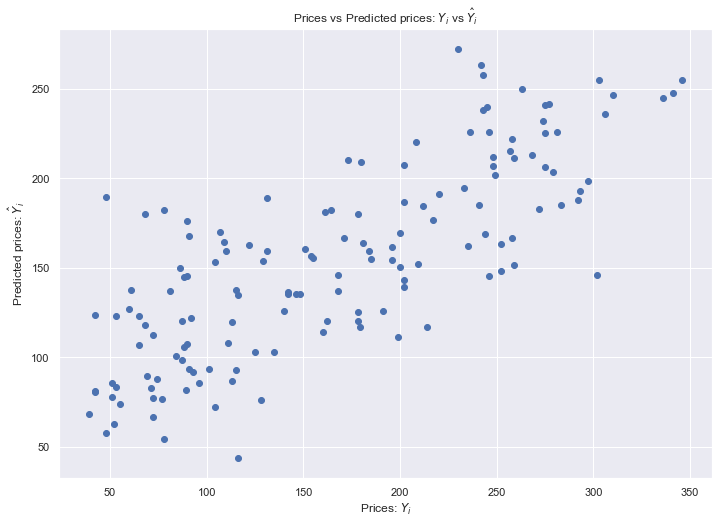

In [18]:
#importer la regression lineaire
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#l'appliquer aux deux dataset de training
lm.fit(X_train, Y_train)


# predire le prix en fonction 
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [28]:
#Accuracy
print("Accuracy ", lm.score(X_train, Y_train))

Accuracy  0.4619713310926238


In [20]:
#scatter_matrix(dataframe_diabet)
#plt.show()
#predictions = lm.predict(X_test)
#print(predictions)